In [87]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import time

In [2]:
# PRECIPITATION
aifs_nh = xr.open_dataset('AIFS_TP_FFX24_NH.nc')
ifs_nh = xr.open_dataset('IFS_TP_FFX24_NH.nc')
era_nh = xr.open_dataset('ERA_NH.nc')

aifs_tp = xr.open_dataset('AIFS_TP_FFX24_TP.nc')
ifs_tp = xr.open_dataset('IFS_TP_FFX24_TP.nc')
era_tp = xr.open_dataset('ERA_TP.nc')

aifs_sh = xr.open_dataset('AIFS_TP_FFX24_SH.nc')
ifs_sh = xr.open_dataset('IFS_TP_FFX24_SH.nc')
era_sh = xr.open_dataset('ERA_SH.nc')

crps_aifs_nh = xr.open_dataarray('CRPS_AIFS_NH_TP.nc')
crps_ifs_nh = xr.open_dataarray('CRPS_IFS_NH_TP.nc')
crps_aifs_tp = xr.open_dataarray('CRPS_AIFS_TP_TP.nc')
crps_ifs_tp = xr.open_dataarray('CRPS_IFS_TP_TP.nc')
crps_aifs_sh = xr.open_dataarray('CRPS_AIFS_SH_TP.nc')
crps_ifs_sh = xr.open_dataarray('CRPS_IFS_SH_TP.nc')

In [159]:
# 2t 24h
aifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/aifs/AIFS_2t_FXX24_NH.nc')                    
ifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/ifs/IFS_2t_FXX24_NH.nc')
# era_nh = xr.open_dataarray('../data/ecmwf/era5/2t/era5_daily_2t_july2sept2025_NH_aligned.nc')
era_nh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_2t_0600UTC_FXX0.nc').sel(latitude=slice(90,23.4))

aifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/aifs/AIFS_2t_FXX24_Tropics.nc')
ifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/ifs/IFS_2t_FXX24_Tropics.nc')
# era_tp = xr.open_dataarray('../data/ecmwf/era5/2t/era5_daily_2t_july2sept2025_Tropics_aligned.nc')
era_tp = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_2t_0600UTC_FXX0.nc').sel(latitude=slice(23.4,-23.4))

aifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/aifs/AIFS_2t_FXX24_SH.nc')
ifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/2t/24/ifs/IFS_2t_FXX24_SH.nc')
# era_sh = xr.open_dataarray('../data/ecmwf/era5/2t/era5_daily_2t_july2sept2025_SH_aligned.nc')
era_sh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_2t_0600UTC_FXX0.nc').sel(latitude=slice(-23.4,-90))

# crps_aifs_nh = xr.open_dataarray('CRPS_AIFS_NH_2t.nc')
# crps_ifs_nh = xr.open_dataarray('CRPS_IFS_NH_2t.nc')
# crps_aifs_tp = xr.open_dataarray('CRPS_AIFS_Tropics_2t.nc')
# crps_ifs_tp = xr.open_dataarray('CRPS_IFS_Tropics_TP.nc')
# crps_aifs_sh = xr.open_dataarray('CRPS_AIFS_SH_2t.nc')
# crps_ifs_sh = xr.open_dataarray('CRPS_IFS_SH_TP.nc')

crps_aifs_nh = xr.open_dataarray('../results/CRPS_AIFS_NH_2t_cf.nc')
crps_ifs_nh = xr.open_dataarray('../results/CRPS_IFS_NH_2t_cf.nc')
crps_aifs_tp = xr.open_dataarray('../results/CRPS_AIFS_Tropics_2t_cf.nc')
crps_ifs_tp = xr.open_dataarray('../results/CRPS_IFS_Tropics_2t_cf.nc')
crps_aifs_sh = xr.open_dataarray('../results/CRPS_AIFS_SH_2t_cf.nc')
crps_ifs_sh = xr.open_dataarray('../results/CRPS_IFS_SH_2t_cf.nc')

In [268]:
# U10
aifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_u10_FXX72_NH.nc')
ifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_u10_FXX72_NH.nc')
# era_nh = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_u10_july2sept2025_NH_aligned.nc')
era_nh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10u_0600UTC_FXX0.nc').sel(latitude=slice(90,23.4))

aifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_u10_FXX72_Tropics.nc')
ifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_u10_FXX72_Tropics.nc')
# era_tp = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_u10_july2sept2025_Tropics_aligned.nc')
era_tp = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10u_0600UTC_FXX0.nc').sel(latitude=slice(23.4,-23.4))

aifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_u10_FXX72_SH.nc')
ifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_u10_FXX72_SH.nc')
# era_sh = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_u10_july2sept2025_SH_aligned.nc')
era_sh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10u_0600UTC_FXX0.nc').sel(latitude=slice(-23.4,-90))

variable = 'u10'

crps_aifs_nh = xr.open_dataarray(f'../results/CRPS_AIFS_NH_{variable}_cf.nc')
crps_ifs_nh = xr.open_dataarray(f'../results/CRPS_IFS_NH_{variable}_cf.nc')
crps_aifs_tp = xr.open_dataarray(f'../results/CRPS_AIFS_Tropics_{variable}_cf.nc')
crps_ifs_tp = xr.open_dataarray(f'../results/CRPS_IFS_Tropics_{variable}_cf.nc')
crps_aifs_sh = xr.open_dataarray(f'../results/CRPS_AIFS_SH_{variable}_cf.nc')
crps_ifs_sh = xr.open_dataarray(f'../results/CRPS_IFS_SH_{variable}_cf.nc')

In [242]:
# V10
aifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_v10_FXX72_NH.nc')
ifs_nh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_v10_FXX72_NH.nc')
# era_nh = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_v10_july2sept2025_NH_aligned.nc')
era_nh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10v_0600UTC_FXX0.nc').sel(latitude=slice(90,23.4))

aifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_v10_FXX72_Tropics.nc')
ifs_tp = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_v10_FXX72_Tropics.nc')
# era_tp = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_v10_july2sept2025_Tropics_aligned.nc')
era_tp = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10v_0600UTC_FXX0.nc').sel(latitude=slice(23.4,-23.4))

aifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/aifs/AIFS_v10_FXX72_SH.nc')
ifs_sh = xr.open_dataarray('../data/ecmwf/ensembles/10uv/72/ifs/IFS_v10_FXX72_SH.nc')
# era_sh = xr.open_dataarray('../data/ecmwf/era5/10uv/era5_daily_v10_july2sept2025_SH_aligned.nc')
era_sh = xr.open_dataarray('../data/ecmwf/ensembles/CF/0/ifs/IFS_10v_0600UTC_FXX0.nc').sel(latitude=slice(-23.4,-90))

variable = 'v10'

# crps_aifs_nh = xr.open_dataarray(f'../results/CRPS_AIFS_NH_{variable}.nc')
# crps_ifs_nh = xr.open_dataarray(f'../results/CRPS_IFS_NH_{variable}.nc')
# crps_aifs_tp = xr.open_dataarray(f'../results/CRPS_AIFS_Tropics_{variable}.nc')
# crps_ifs_tp = xr.open_dataarray(f'../results/CRPS_IFS_Tropics_{variable}.nc')
# crps_aifs_sh = xr.open_dataarray(f'../results/CRPS_AIFS_SH_{variable}.nc')
# crps_ifs_sh = xr.open_dataarray(f'../results/CRPS_IFS_SH_{variable}.nc')

crps_aifs_nh = xr.open_dataarray(f'../results/CRPS_AIFS_NH_{variable}_cf.nc')
crps_ifs_nh = xr.open_dataarray(f'../results/CRPS_IFS_NH_{variable}_cf.nc')
crps_aifs_tp = xr.open_dataarray(f'../results/CRPS_AIFS_Tropics_{variable}_cf.nc')
crps_ifs_tp = xr.open_dataarray(f'../results/CRPS_IFS_Tropics_{variable}_cf.nc')
crps_aifs_sh = xr.open_dataarray(f'../results/CRPS_AIFS_SH_{variable}_cf.nc')
crps_ifs_sh = xr.open_dataarray(f'../results/CRPS_IFS_SH_{variable}_cf.nc')

In [269]:
# ifs_nh = ifs_nh * 1000
# print("Converted IFS NH to mm")
# ifs_tp = ifs_tp * 1000
# print("Converted IFS TP to mm")
# ifs_sh = ifs_sh * 1000
# print("Converted IFS SH to mm")

In [270]:
crpss_nh = 1 - crps_aifs_nh.mean().values.item()/crps_ifs_nh.mean().values.item()
crpss_tp = 1 - crps_aifs_tp.mean().values.item() / crps_ifs_tp.mean().values.item()
crpss_sh = 1 - crps_aifs_sh.mean().values.item() / crps_ifs_sh.mean().values.item()

In [271]:
100*crpss_nh, 100*crpss_tp, 100*crpss_sh

(1.241794230064952, -3.408542354410482, -0.6964320670466373)

In [272]:
thresholds = [0.1, 1.0, 5.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0,
              100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0,
              200.0, 225.0, 250.0, 275.0, 
              300.0, 350.0, 400.0, 450.0, 500.0]

thresholds = [270,280,290,
              300,305,
              310,311,312,313,314,
              315,316,317,318,319,
              320,321,322,323,324,325]

thresholds = [1,5,10,15,20,25,30,35,40]

In [273]:
absolute_vals = True

era_nh_og = era_nh
era_tp_og = era_tp
era_sh_og = era_sh

if absolute_vals:
    era_nh = abs(era_nh)
    era_tp = abs(era_tp)
    era_sh = abs(era_sh)

In [274]:
quantiles = [0,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,0.995,0.999,0.9995,0.9999,0.99999]
thresholds_nh = [era_nh.quantile(q).data.item() for q in quantiles]
thresholds_tropics = [era_tp.quantile(q).data.item() for q in quantiles]
thresholds_sh = [era_sh.quantile(q).data.item() for q in quantiles]

In [276]:
# t2
variable = 't2m' #'t2m_daily_06UTC_selected'
ens_variable = 't2m'

# u10
variable = 'u10' #'u10_daily_06UTC_selected'
ens_variable = 'u10'

# v10
# variable = 'v10' #'v10_daily_06UTC_selected'
# ens_variable = 'v10'

In [277]:
crps_aifs_nh_th, crps_ifs_nh_th = [], []
crps_aifs_tp_th, crps_ifs_tp_th = [], []
crps_aifs_sh_th, crps_ifs_sh_th = [], []
crps_aifs_nh_th_std, crps_ifs_nh_th_std = [], []
crps_aifs_tp_th_std, crps_ifs_tp_th_std = [], []
crps_aifs_sh_th_std, crps_ifs_sh_th_std = [], []
obs_count_nh, obs_count_tp, obs_count_sh = [], [], []

# for threshold in thresholds[:]: 
#     print(threshold)
#     obs_count_nh.append((abs(era_nh)>threshold).sum()[variable].values.item())
#     obs_count_tp.append((era_tp>threshold).sum()[variable].values.item())
#     obs_count_sh.append((era_sh>threshold).sum()[variable].values.item())

#     crps_aifs_nh_th.append(crps_aifs_nh.where(era_nh>threshold).mean()[variable].values.item())
#     crps_ifs_nh_th.append(crps_ifs_nh.where(era_nh>threshold).mean()[variable].values.item())
#     crps_aifs_tp_th.append(crps_aifs_tp.where(era_tp>threshold).mean()[variable].values.item())
#     crps_ifs_tp_th.append(crps_ifs_tp.where(era_tp>threshold).mean()[variable].values.item())
#     crps_aifs_sh_th.append(crps_aifs_sh.where(era_sh>threshold).mean()[variable].values.item())
#     crps_ifs_sh_th.append(crps_ifs_sh.where(era_sh>threshold).mean()[variable].values.item())

#     crps_aifs_nh_th_std.append(crps_aifs_nh.where(era_nh>threshold).std()[variable].values.item())
#     crps_ifs_nh_th_std.append(crps_ifs_nh.where(era_nh>threshold).std()[variable].values.item())
#     crps_aifs_tp_th_std.append(crps_aifs_tp.where(era_tp>threshold).std()[variable].values.item())
#     crps_ifs_tp_th_std.append(crps_ifs_tp.where(era_tp>threshold).std()[variable].values.item())
#     crps_aifs_sh_th_std.append(crps_aifs_sh.where(era_sh>threshold).std()[variable].values.item())
#     crps_ifs_sh_th_std.append(crps_ifs_sh.where(era_sh>threshold).std()[variable].values.item())

for i in range(len(quantiles)): 

    threshold_nh, threshold_tropics, threshold_sh = thresholds_nh[i], thresholds_tropics[i], thresholds_sh[i]
    
    print(threshold_nh, threshold_tropics, threshold_sh)
    obs_count_nh.append((era_nh>threshold_nh).sum().values.item())
    obs_count_tp.append((era_tp>threshold_tropics).sum().values.item())
    obs_count_sh.append((era_sh>threshold_sh).sum().values.item())

    crps_aifs_nh_th.append(crps_aifs_nh.where(era_nh>threshold_nh).mean().values.item())
    crps_ifs_nh_th.append(crps_ifs_nh.where(era_nh>threshold_nh).mean().values.item())
    crps_aifs_tp_th.append(crps_aifs_tp.where(era_tp>threshold_tropics).mean().values.item())
    crps_ifs_tp_th.append(crps_ifs_tp.where(era_tp>threshold_tropics).mean().values.item())
    crps_aifs_sh_th.append(crps_aifs_sh.where(era_sh>threshold_sh).mean().values.item())
    crps_ifs_sh_th.append(crps_ifs_sh.where(era_sh>threshold_sh).mean().values.item())

    crps_aifs_nh_th_std.append(crps_aifs_nh.where(era_nh>threshold_nh).std().values.item())
    crps_ifs_nh_th_std.append(crps_ifs_nh.where(era_nh>threshold_nh).std().values.item())
    crps_aifs_tp_th_std.append(crps_aifs_tp.where(era_tp>threshold_tropics).std().values.item())
    crps_ifs_tp_th_std.append(crps_ifs_tp.where(era_tp>threshold_tropics).std().values.item())
    crps_aifs_sh_th_std.append(crps_aifs_sh.where(era_sh>threshold_sh).std().values.item())
    crps_ifs_sh_th_std.append(crps_ifs_sh.where(era_sh>threshold_sh).std().values.item())

4.57763671875e-05 4.57763671875e-05 4.57763671875e-05
0.0428924560546875 0.0594940185546875 0.1033935546875
0.2119140625 0.3033905029296875 0.5154876708984375
0.4268035888671875 0.6268157958984375 1.0314178466796875
0.8780059814453125 1.333709716796875 2.0715179443359375
1.3582916259765625 2.14459228515625 3.123992919921875
1.8828552246100116 3.0562591552734375 4.2121429443359375
2.4762420654296875 4.01593017578125 5.3451995849609375
3.1643829345703125 4.9879913330078125 6.5692596435546875
3.994171142578125 5.9455413818359375 7.96441650390625
5.060882568359375 6.9237823486328125 9.683670043945312
6.6466064453125 8.124282836914062 12.078079223632812
8.018356323242188 9.034011840820312 13.974380493164062
11.061050415039062 10.729492340087916 17.428054809570312
12.4649658203125 11.426727294921875 18.690032958984375
15.385040283203125 12.865982055664062 21.566256851196158
16.577859603881734 13.423782348632812 22.8936065750122
19.4755859375 15.395033613585724 26.488800048828125
24.872165695

In [278]:
units = 'm/s'
# units = "K"

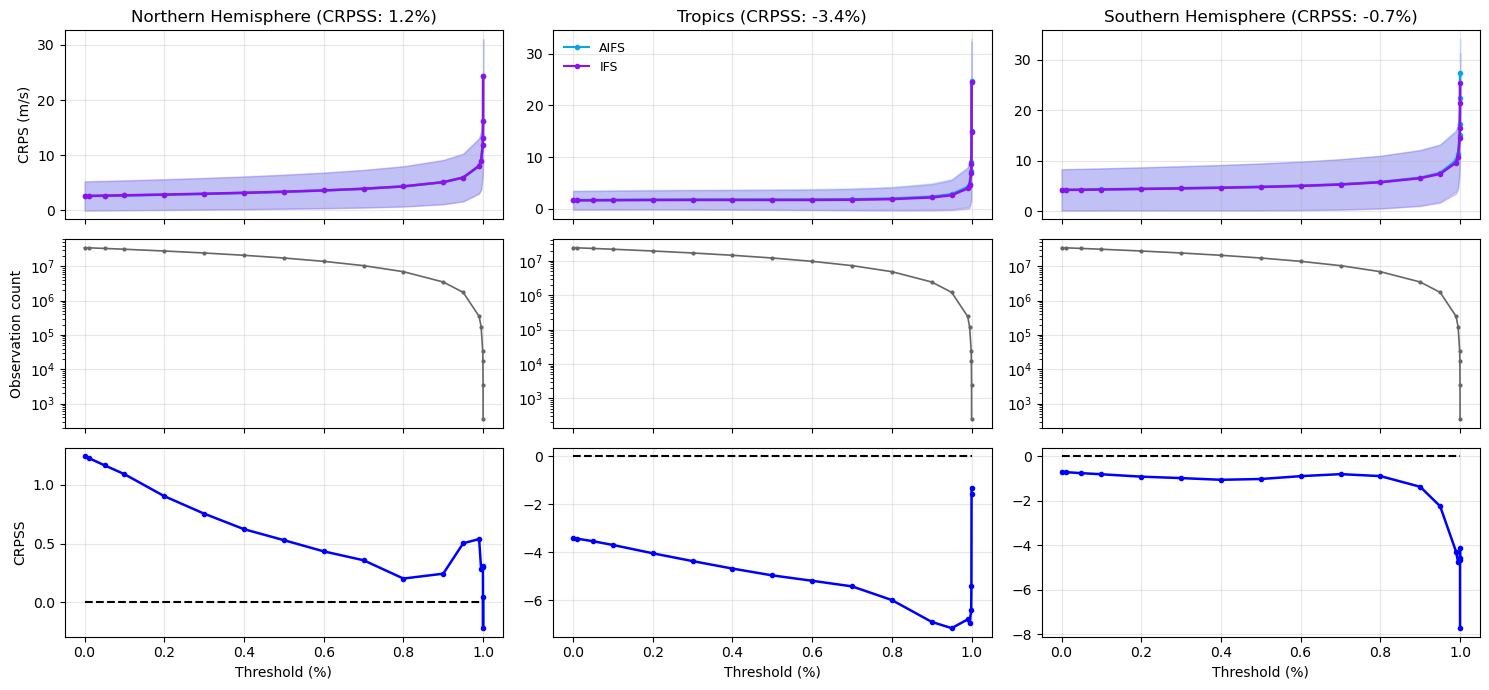

In [280]:
# Colors: distinct per model, neutral for obs (color-blind friendly palette)
model_colors = {
    "AIFS": "#0DA5E0",   # blue
    "IFS":  "#8E11ED",   # orange
}
obs_color = "#666666"    # neutral grey

# Regions with full names
regions = [
    ("Northern Hemisphere", crps_aifs_nh_th, crps_ifs_nh_th, obs_count_nh, crps_aifs_nh_th_std, crps_ifs_nh_th_std, crpss_nh),
    ("Tropics",      crps_aifs_tp_th, crps_ifs_tp_th, obs_count_tp, crps_aifs_tp_th_std, crps_ifs_tp_th_std, crpss_tp),
    ("Southern Hemisphere", crps_aifs_sh_th, crps_ifs_sh_th, obs_count_sh, crps_aifs_sh_th_std, crps_ifs_sh_th_std, crpss_sh),
]

# Create 2x3 subplot grid
fig, axes = plt.subplots(3, 3, figsize=(15, 7), sharex=True)

for col, (region_name, aifs_crps, ifs_crps, obs_cnt, aifs_crps_std, ifs_crps_std, crpss_reg) in enumerate(regions):


    # if col==0: thresholds = thresholds_nh
    # elif col==1: thresholds = thresholds_tropics
    # elif col==2: thresholds = thresholds_sh

    thresholds = quantiles 
    # print(region_name, col, thresholds)
    # --- Top row: CRPS ---
    ax_top = axes[0, col]
    ax_top.plot(thresholds, aifs_crps, color=model_colors["AIFS"], linestyle="-",
                marker="o", markersize=3, linewidth=1.8, label="AIFS")
    ax_top.plot(thresholds, ifs_crps, color=model_colors["IFS"], linestyle="-",
                marker="o", markersize=3, linewidth=1.8, label="IFS")
    ax_top.fill_between(thresholds, np.array(aifs_crps) - np.array(aifs_crps_std), np.array(aifs_crps) + np.array(aifs_crps_std), alpha=0.2, color=model_colors["AIFS"])
    ax_top.fill_between(thresholds, np.array(ifs_crps) - np.array(ifs_crps_std), np.array(ifs_crps) + np.array(ifs_crps_std), alpha=0.2, color=model_colors["IFS"])
    ax_top.set_title(f"{region_name} (CRPSS: {100*crpss_reg:.1f}%)", fontsize=12)
    ax_top.grid(True, alpha=0.3)
    if col == 0:
        ax_top.set_ylabel(f"CRPS ({units})")

    # --- Bottom row: Observation counts ---
    ax_bot = axes[1, col]
    ax_bot.plot(thresholds, obs_cnt, color=obs_color, linestyle="-",
                marker="o", markersize=2, linewidth=1.2, label="ERA5 Obs count")
    ax_bot.set_yscale("log")
    ax_bot.grid(True, alpha=0.3)
    if col == 0:
        ax_bot.set_ylabel("Observation count")

    ax_mid = axes[2,col]
    crpss = 100 - 100*np.divide(aifs_crps,ifs_crps)
    # crpss = 100 - 100*np.divide(np.subtract(aifs_crps, ifs_crps), ifs_crps)*100
    # ax_mid.plot(thresholds, rel_crps, color='g', linestyle="-",
    #             marker="o", markersize=3, linewidth=1.8, label="RelCRPS")
    ax_mid.plot(thresholds, crpss, color='b', linestyle="-",
                marker="o", markersize=3, linewidth=1.8, label="CRPSS")
    ax_mid.plot([min(thresholds), max(thresholds)], [0,0], color='black', linestyle='--')
    if col == 0: ax_mid.set_ylabel('CRPSS')
    # ax_mid.set_xlabel(f"Threshold ({units})")
    ax_mid.set_xlabel(f"Threshold (%)")
    ax_mid.grid(True, alpha=0.3)

# --- Legend: inside the middle CRPS subplot (Tropics) ---
legend_ax = axes[0, 1]
handles = [
    plt.Line2D([], [], color=model_colors["AIFS"], marker="o", linestyle="-", markersize=3, label="AIFS"),
    plt.Line2D([], [], color=model_colors["IFS"],  marker="o", linestyle="-", markersize=3, label="IFS"),
    # plt.Line2D([], [], color=obs_color, marker="o", linestyle="-", markersize=2, label="ERA5 Obs count")
]
legend_ax.legend(handles=handles, loc="upper left", frameon=False, fontsize=9)

fig.tight_layout()
plt.show()

In [ ]:
regions = {"Northern Hemisphere": (aifs_nh, ifs_nh, era_nh),
           "Tropics": (aifs_tp, ifs_tp, era_tp),
           "Southern Hemisphere": (aifs_sh, ifs_sh, era_sh)}

# plot spatially aggregated precipitation time series for each region as a 1 x 3 subplot
fig, axes = plt.subplots(3, 1, figsize=(15, 8), sharey=True)

for ax, (region_name, (aifs_region, ifs_region, era_region)) in zip(axes.flatten(), regions.items()):

    print(region_name)
    time = aifs_region.time
    x = aifs_region[ens_variable].mean(dim=["latitude", "longitude"])
    y = ifs_region[ens_variable].mean(dim=["latitude", "longitude"])
    z = era_region[variable].mean(dim=["latitude", "longitude"])

    x_mean = x.mean(dim=["number"]).values
    y_mean = y.mean(dim=["number"]).values
    x_std = x.std(dim=["number"]).values
    y_std = y.std(dim=["number"]).values

    ax.plot(time, x_mean, color=model_colors["AIFS"], linestyle="-", marker=None, linewidth=1.5, label="AIFS")
    ax.plot(time, y_mean, color=model_colors["IFS"], linestyle="-", marker=None, linewidth=1.5, label="IFS")
    ax.plot(time, z, color=obs_color, linestyle="-", marker=None, linewidth=1.5, label="ERA5")
    ax.fill_between(time, x_mean - x_std, x_mean + x_std, color=model_colors["AIFS"], alpha=0.2)
    ax.fill_between(time, y_mean - y_std, y_mean + y_std, color=model_colors["IFS"], alpha=0.2)

    ax.set_title(region_name, fontsize=12)
    ax.set_xlabel("Time")
    ax.set_ylabel("Precipitation (mm)")
    ax.grid(True, alpha=0.3)

    # ax.set_ylim(y_mean.min() - 0.2, y_mean.max() + 0.2)
    ax.set_xlim(time.min(), time.max())

    # Add legend only to the Northern Hemisphere subplot
    if region_name == "Northern Hemisphere":
        ax.legend(loc="upper right", frameon=False, fontsize=9)
    
    ax.set_ylim(min(y_mean.min(), x_mean.min(), z.min()) - 0.2, max(x_mean.max(), y_mean.max(), z.max()) + 0.2)

fig.tight_layout()
plt.show()